In [1]:
import os, shutil
print(os.listdir("C:/Users/Dilip/Desktop/precessData"))

['cat', 'crop0.jpg', 'crop57.jpg', 'resizeImg', 'test', 'test123', 'test2', 'test3', 'train', 'train123']


In [2]:
import random
import gc  
from keras.utils.np_utils import to_categorical 

Using TensorFlow backend.


In [3]:
# # Renaming testing weed images
# i=0
# for filename in os.listdir('C:/Users/Dilip/Desktop/precessData/test/weed'):
#     dst = 'weed'+ str(i) + '.jpg'
#     src = 'C:/Users/Dilip/Desktop/precessData/test/weed/' + filename
#     dst = 'C:/Users/Dilip/Desktop/precessData/test/weed/' + dst
#     os.rename(src,dst)
#     i = i+1


In [4]:
# # renaming testing crop images
# i=0
# for filename in os.listdir('C:/Users/Dilip/Desktop/precessData/test/crop'):
#     dst = 'crop'+ str(i) + '.jpg'
#     src = 'C:/Users/Dilip/Desktop/precessData/test/crop/' + filename
#     dst = 'C:/Users/Dilip/Desktop/precessData/test/crop/' + dst
#     os.rename(src,dst)
#     i = i+1

In [5]:
# # renaming training weed images
# i=0
# for filename in os.listdir('C:/Users/Dilip/Desktop/precessData/train/weed'):
#     dst = 'weed'+ str(i) + '.jpg'
#     src = 'C:/Users/Dilip/Desktop/precessData/train/weed/' + filename
#     dst = 'C:/Users/Dilip/Desktop/precessData/train/weed/' + dst
#     os.rename(src,dst)
#     i = i+1

In [6]:
# # Renaming training crop images
# i=0
# for filename in os.listdir('C:/Users/Dilip/Desktop/precessData/train/crop'):
#     dst = 'crop'+ str(i) + '.jpg'
#     src = 'C:/Users/Dilip/Desktop/precessData/train/crop/' + filename
#     dst = 'C:/Users/Dilip/Desktop/precessData/train/crop/' + dst
#     os.rename(src,dst)
#     i = i+1

In [7]:
train_dir = 'C:/Users/Dilip/Desktop/precessData/train'
test_dir = 'C:/Users/Dilip/Desktop/precessData/test'

train_crop = ['C:/Users/Dilip/Desktop/precessData/train/{}'.format(i) for i in os.listdir(train_dir) if 'crop' in i] 
train_weed = ['C:/Users/Dilip/Desktop/precessData/train/{}'.format(i) for i in os.listdir(train_dir) if 'weed' in i]  
train_soil = ['C:/Users/Dilip/Desktop/precessData/train/{}'.format(i) for i in os.listdir(train_dir) if 'soil' in i]

test_imgs = ['C:/Users/Dilip/Desktop/precessData/test/{}'.format(i) for i in os.listdir(test_dir)] 

train_imgs = train_crop[:] + train_weed[:] + train_soil[:]  
random.shuffle(train_imgs) 


del train_crop
del train_weed
del train_soil
gc.collect()   

22

In [8]:
test_imgs

['C:/Users/Dilip/Desktop/precessData/test/crop0.jpg',
 'C:/Users/Dilip/Desktop/precessData/test/crop1.jpg',
 'C:/Users/Dilip/Desktop/precessData/test/crop10.jpg',
 'C:/Users/Dilip/Desktop/precessData/test/crop11.jpg',
 'C:/Users/Dilip/Desktop/precessData/test/crop12.jpg',
 'C:/Users/Dilip/Desktop/precessData/test/crop13.jpg',
 'C:/Users/Dilip/Desktop/precessData/test/crop14.jpg',
 'C:/Users/Dilip/Desktop/precessData/test/crop15.jpg',
 'C:/Users/Dilip/Desktop/precessData/test/crop16.jpg',
 'C:/Users/Dilip/Desktop/precessData/test/crop17.jpg',
 'C:/Users/Dilip/Desktop/precessData/test/crop18.jpg',
 'C:/Users/Dilip/Desktop/precessData/test/crop19.jpg',
 'C:/Users/Dilip/Desktop/precessData/test/crop2.jpg',
 'C:/Users/Dilip/Desktop/precessData/test/crop20.jpg',
 'C:/Users/Dilip/Desktop/precessData/test/crop21.jpg',
 'C:/Users/Dilip/Desktop/precessData/test/crop22.jpg',
 'C:/Users/Dilip/Desktop/precessData/test/crop23.jpg',
 'C:/Users/Dilip/Desktop/precessData/test/crop24.jpg',
 'C:/Users/Di

In [9]:
#  Value checking

# print(train_imgs)
c_weed = 0
c_crop = 0
c_soil = 0
for img in train_imgs:
    if 'weed' in img:
        c_weed = c_weed+1
    elif 'crop' in img:
        c_crop = c_crop + 1
    else:
        c_soil = c_soil + 1

print(c_weed)
print(c_crop)
print(c_soil)

500
500
500


In [10]:
#Import some packages to use
import cv2
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from matplotlib import ticker
import seaborn as sns
%matplotlib inline 

In [11]:

nrows = 150
ncolumns = 150
channels = 3  

In [12]:
def read_and_process_image(list_of_images):
    """
    Returns two arrays:
        X is an array of resized images
        y is an array of labels
    """
    X = [] # images
    y = [] # labels
   
    for image in list_of_images:
        try :
            img = mpimg.imread(image)
            X.append(cv2.resize(img, (nrows,ncolumns), interpolation=cv2.INTER_CUBIC))  
            
            if 'crop' in image:
                y.append(1)
            elif 'weed' in image:
                y.append(0)
            elif 'soil' in image:
                y.append(2)
        except Exception as e:
            print(str(e))
   
    return X, y

In [13]:
#get the train and label data
X, y = read_and_process_image(train_imgs)
# print(train_imgs)

In [68]:
# def decode_image_from_raw_bytes(filename):
#     img = cv2.imread(filename)
# #     img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
#     return img

In [14]:
import keras
# def prepare_raw_bytes_for_model(raw_bytes, normalize_for_model=True):
# #     img = image_center_crop(raw_bytes)  # take squared center crop
#     img = cv2.resize(raw_bytes, (150, 150))  # resize for our model
#     if normalize_for_model:
# #         img = img.astype("float32")  # prepare for normalization
#         img = keras.applications.inception_resnet_v2.preprocess_input(img)  # normalize for model
#     return img

In [15]:
# def image_center_crop(img):
#     """
#     Makes a square center crop of an img, which is a [h, w, 3] numpy array.
#     Returns [min(h, w), min(h, w), 3] output with same width and height.
#     """
#     cropped_img = img[int((img.shape[0] - min(img.shape[0], img.shape[1]))/2): int((img.shape[0] + min(img.shape[0], img.shape[1]))/2), int((img.shape[1] - min(img.shape[0], img.shape[1]))/2): int((img.shape[1] + min(img.shape[0], img.shape[1]))/2), :]
    
#     return cropped_img

In [16]:
def img_pred(file):
    img = mpimg.imread(file)
    img = cv2.resize(img, (nrows,ncolumns), interpolation=cv2.INTER_CUBIC)
    img = keras.applications.inception_resnet_v2.preprocess_input(img)
    return img

NameError: name 'X' is not defined

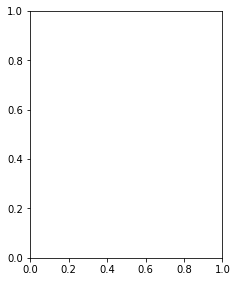

In [52]:
#Lets view some of the pics
plt.figure(figsize=(20,10))
columns = 5
for i in range(columns):
    plt.subplot(5 / columns + 1, columns, i + 1)
    plt.imshow(X[i])

In [51]:
del train_imgs
gc.collect()

X = np.array(X)
y = np.array(y)

sns.countplot(y)
plt.title('Labels for Crop and Weed')

NameError: name 'train_imgs' is not defined

In [50]:
print("Shape of train images is:", X.shape)
print("Shape of labels is:", y.shape)

NameError: name 'X' is not defined

In [49]:
y

NameError: name 'y' is not defined

In [20]:
from sklearn.model_selection import train_test_split

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.20, random_state=2)

In [55]:
X_val

array([[[[174, 206, 201],
         [149, 180, 175],
         [160, 185, 185],
         ...,
         [128, 173, 166],
         [110, 141, 143],
         [ 81, 122, 124]],

        [[120, 132, 150],
         [174, 199, 196],
         [221, 238, 246],
         ...,
         [146, 188, 187],
         [115, 151, 151],
         [115, 154, 153]],

        [[164, 181, 198],
         [175, 201, 208],
         [181, 212, 207],
         ...,
         [152, 205, 195],
         [129, 171, 170],
         [ 92, 135, 133]],

        ...,

        [[152, 174, 171],
         [115, 135, 133],
         [ 97, 121, 133],
         ...,
         [ 87,  72,  77],
         [ 93,  86,  93],
         [ 89,  79,  90]],

        [[128, 154, 151],
         [155, 173, 183],
         [154, 170, 190],
         ...,
         [ 24,  18,  20],
         [ 93,  82,  90],
         [ 69,  62,  69]],

        [[129, 141, 141],
         [108, 127, 133],
         [113, 127, 140],
         ...,
         [ 66,  60,  62],
        

In [21]:

del X
del y
gc.collect()

ntrain = len(X_train)
print(ntrain)
nval = len(X_val)

batch_size = 32  

1200


In [22]:
from keras.applications import InceptionResNetV2

conv_base = InceptionResNetV2(weights='imagenet', include_top=False, input_shape=(150,150,3))
conv_base.summary()














__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            (None, 150, 150, 3)  0                                            
__________________________________________________________________________________________________
conv2d_1 (Conv2D)               (None, 74, 74, 32)   864         input_1[0][0]                    
__________________________________________________________________________________________________
batch_normalization_1 (BatchNor (None, 74, 74, 32)   96          conv2d_1[0][0]                   
__________________________________________________________________________________________________
activation_1 (Activation)       (None, 74, 74, 32)   0           batch_normalization_1[0][0]      
________________________________________________________________________________________________

activation_179 (Activation)     (None, 3, 3, 256)    0           batch_normalization_179[0][0]    
__________________________________________________________________________________________________
block8_4_mixed (Concatenate)    (None, 3, 3, 448)    0           activation_176[0][0]             
                                                                 activation_179[0][0]             
__________________________________________________________________________________________________
block8_4_conv (Conv2D)          (None, 3, 3, 2080)   933920      block8_4_mixed[0][0]             
__________________________________________________________________________________________________
block8_4 (Lambda)               (None, 3, 3, 2080)   0           block8_3_ac[0][0]                
                                                                 block8_4_conv[0][0]              
__________________________________________________________________________________________________
block8_4_a

In [23]:
from keras import layers
from keras import models

model = models.Sequential()
model.add(conv_base)

model.add(layers.Flatten()) 
model.add(layers.Dense(100, activation='relu')) 
model.add(layers.Dropout(0.25)) 
model.add(layers.Dense(50,activation='relu')) 
model.add(layers.Dropout(0.25)) 
model.add(layers.Dense(3, activation='softmax'))


Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


In [24]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
inception_resnet_v2 (Model)  (None, 3, 3, 1536)        54336736  
_________________________________________________________________
flatten_1 (Flatten)          (None, 13824)             0         
_________________________________________________________________
dense_1 (Dense)              (None, 100)               1382500   
_________________________________________________________________
dropout_1 (Dropout)          (None, 100)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 50)                5050      
_________________________________________________________________
dropout_2 (Dropout)          (None, 50)                0         
_________________________________________________________________
dense_3 (Dense)              (None, 3)                 153       
Total para

In [25]:
for layer in conv_base.layers:
    layer.trainable = True

print('Number of trainable weights after freezing the conv base:', len(conv_base.trainable_weights))
for layer in conv_base.layers[:-50]:
    layer.trainable = False

print('Number of trainable weights after freezing the conv base:', len(conv_base.trainable_weights))

Number of trainable weights after freezing the conv base: 488
Number of trainable weights after freezing the conv base: 32


In [26]:

from keras import optimizers

model.compile(loss='sparse_categorical_crossentropy', optimizer=optimizers.RMSprop(lr=2e-5), metrics=['acc'])

In [27]:

from keras.preprocessing.image import ImageDataGenerator
from keras.preprocessing.image import img_to_array, load_img

train_datagen = ImageDataGenerator(rescale=1./255,   
                                    rotation_range=40,
                                    width_shift_range=0.2,
                                    height_shift_range=0.2,
                                    shear_range=0.2,
                                    zoom_range=0.2,
                                    horizontal_flip=True,
                                    fill_mode='nearest')

val_datagen = ImageDataGenerator(rescale=1./255)  

In [28]:
train_generator = train_datagen.flow(X_train, y_train,batch_size=batch_size)
val_generator = val_datagen.flow(X_val, y_val, batch_size=batch_size)

In [29]:

history = model.fit_generator(train_generator,
                              steps_per_epoch=ntrain // batch_size,
                              epochs=5,
                              validation_data=val_generator,
                              validation_steps=nval // batch_size)

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


Epoch 1/5
37/37 [==============================] - 97s 3s/step - loss: 0.8983 - acc: 0.5887 - val_loss: 0.6270 - val_acc: 0.8403
Epoch 2/5
37/37 [==============================] - 71s 2s/step - loss: 0.5914 - acc: 0.8013 - val_loss: 0.3974 - val_acc: 0.9254
Epoch 3/5
37/37 [==============================] - 61s 2s/step - loss: 0.3727 - acc: 0.8951 - val_loss: 0.2536 - val_acc: 0.9701
Epoch 4/5
37/37 [==============================] - 61s 2s/step - loss: 0.2888 - acc: 0.9163 - val_loss: 0.1867 - val_acc: 0.9701
Epoch 5/5
37/37 [==============================] - 61s 2s/step - loss: 0.2062 - acc: 0.9416 - val_loss: 0.2808 - val_acc: 0.9328


In [29]:
# X, y = read_and_process_image(test_imgs)
model.load_weights('model_wieghtsWeedCropSoil1.h5')

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


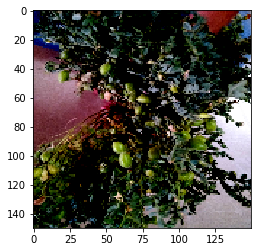

[[0.38080412 0.5994804  0.01971552]] 0.5994804
weed


In [25]:
img = img_pred("C:/Users/Dilip/Desktop/newData/newData(2).jpg") 
plt.imshow(img) 
plt.show() 
img = np.reshape(img, [1, img.shape[0], img.shape[1], img.shape[2]]) 
prediction = model.predict(img)

print(prediction,prediction.max()) 
if prediction.max() == prediction[0][0]: 
    print('crop') 
if prediction.max() == prediction[0][1]: 
    print('weed') 
if prediction.max() == prediction[0][2]:
    print('soil')

In [63]:
score =  model.evaluate(X_train,y_train)

1200/1200 [==============================] - 50s 42ms/step


In [64]:
score

[11.255803260803223, 0.3016666666666667]

In [65]:
y_pred = model.predict(X_train)

In [66]:
predictions = model.predict(X_val)
# predictions

In [68]:
y_pred = (y_pred > 0.5)
y_pred

array([[False,  True, False],
       [ True, False, False],
       [ True, False, False],
       ...,
       [False, False,  True],
       [ True, False, False],
       [False, False,  True]])

In [72]:
a = np.array(y_train)
b = np.zeros((a.size, a.max()+1))
b[np.arange(a.size),a] = 1
b

array([[0., 0., 1.],
       [0., 1., 0.],
       [0., 1., 0.],
       ...,
       [1., 0., 0.],
       [0., 0., 1.],
       [1., 0., 0.]])

In [36]:
from sklearn.metrics import confusion_matrix

In [73]:
matrix = confusion_matrix(b.argmax(axis=1), y_pred.argmax(axis=1))

In [74]:
matrix

array([[198, 120,  77],
       [248, 110,  45],
       [123, 225,  54]], dtype=int64)


img = img_pred("C:/Users/Dilip/Desktop/newData/newData(2).jpg")
plt.imshow(img)
plt.show()
img = np.reshape(img, [1, img.shape[0], img.shape[1], img.shape[2]])
prediction = model.predict(img)

print(prediction,prediction.max())
if prediction.max() == prediction[0][0]:
    print('crop')
if prediction.max() == prediction[0][1]:
    print('weed')
if prediction.max() == prediction[0][2]:
    print('soil')


In [60]:
# X = np.array([i[0] for i in X]).reshape(-1, 150, 150, 1)

ValueError: cannot reshape array of size 450 into shape (150,150,1)

In [46]:
# loss, acc = model.evaluate(X, y,batch_size=32, verbose = 0)
# print(acc * 100)

ValueError: Error when checking input: expected inception_resnet_v2_input to have 4 dimensions, but got array with shape (150, 150, 3)

In [1]:
model.save_weights('model_wieghtsWeedCropSoil5epoch.h5')
model.save('model_wieghtsWeedCropSoil5epoch.h5')

NameError: name 'model' is not defined

In [21]:
model.load_weights('fin99.h5')

In [38]:
test_generator = ImageDataGenerator()
test_data_generator = test_generator.flow_from_directory(
    'C:/Users/Dilip/Desktop/precessData/test2',
     target_size=(512, 512),
    batch_size=8,
    shuffle=False)
test_steps_per_epoch = np.math.ceil(test_data_generator.samples / test_data_generator.batch_size)

predictions = model.predict_generator(test_data_generator, steps=test_steps_per_epoch)
# Get most likely class
predicted_classes = np.argmax(predictions, axis=1)

Found 80 images belonging to 2 classes.


In [45]:
print(predicted_classes)
true_classes = test_data_generator.classes
class_labels = list(test_data_generator.class_indices.keys()) 
print(true_classes)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0]
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1]


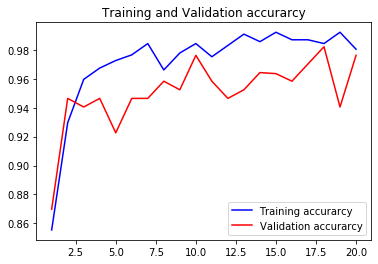

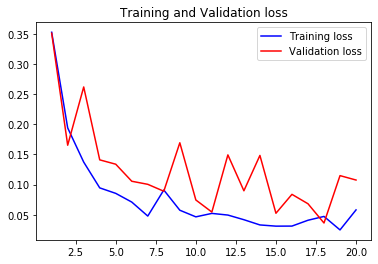

In [62]:
import matplotlib.pyplot as plt

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'b', label='Training accurarcy')
plt.plot(epochs, val_acc, 'r', label='Validation accurarcy')
plt.title('Training and Validation accurarcy')
plt.legend()

plt.figure()
plt.plot(epochs, loss, 'b', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and Validation loss')
plt.legend()

plt.show()

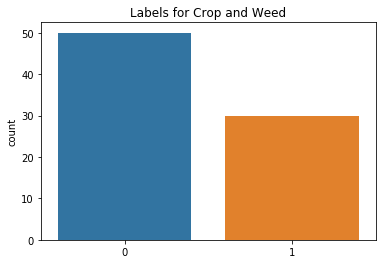

In [58]:
test_imgs = ['C:/Users/Dilip/Desktop/precessData/test3/{}'.format(i) for i in os.listdir('C:/Users/Dilip/Desktop/precessData/test3')] #get test images

X_test, y_test = read_and_process_image(test_imgs) 
X = np.array(X_test)
y = np.array(y_test)

sns.countplot(y)
plt.title('Labels for Crop and Weed')
test_datagen = ImageDataGenerator(rescale=1./255)
train_generator = test_datagen.flow(X, y,batch_size=8)

In [60]:
test_steps_per_epoch = len(test_imgs) // 8
print(test_steps_per_epoch)
predictions = model.predict_generator(train_generator, steps=10)

10


In [65]:
# predicted_classes = np.argmax(predictions, axis=1)
# print(predicted_classes)
# true_classes = train_generator.classes
# class_labels = list(train_generator.class_indices.keys()) 
# print(true_classes)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0]


AttributeError: 'NumpyArrayIterator' object has no attribute 'classes'

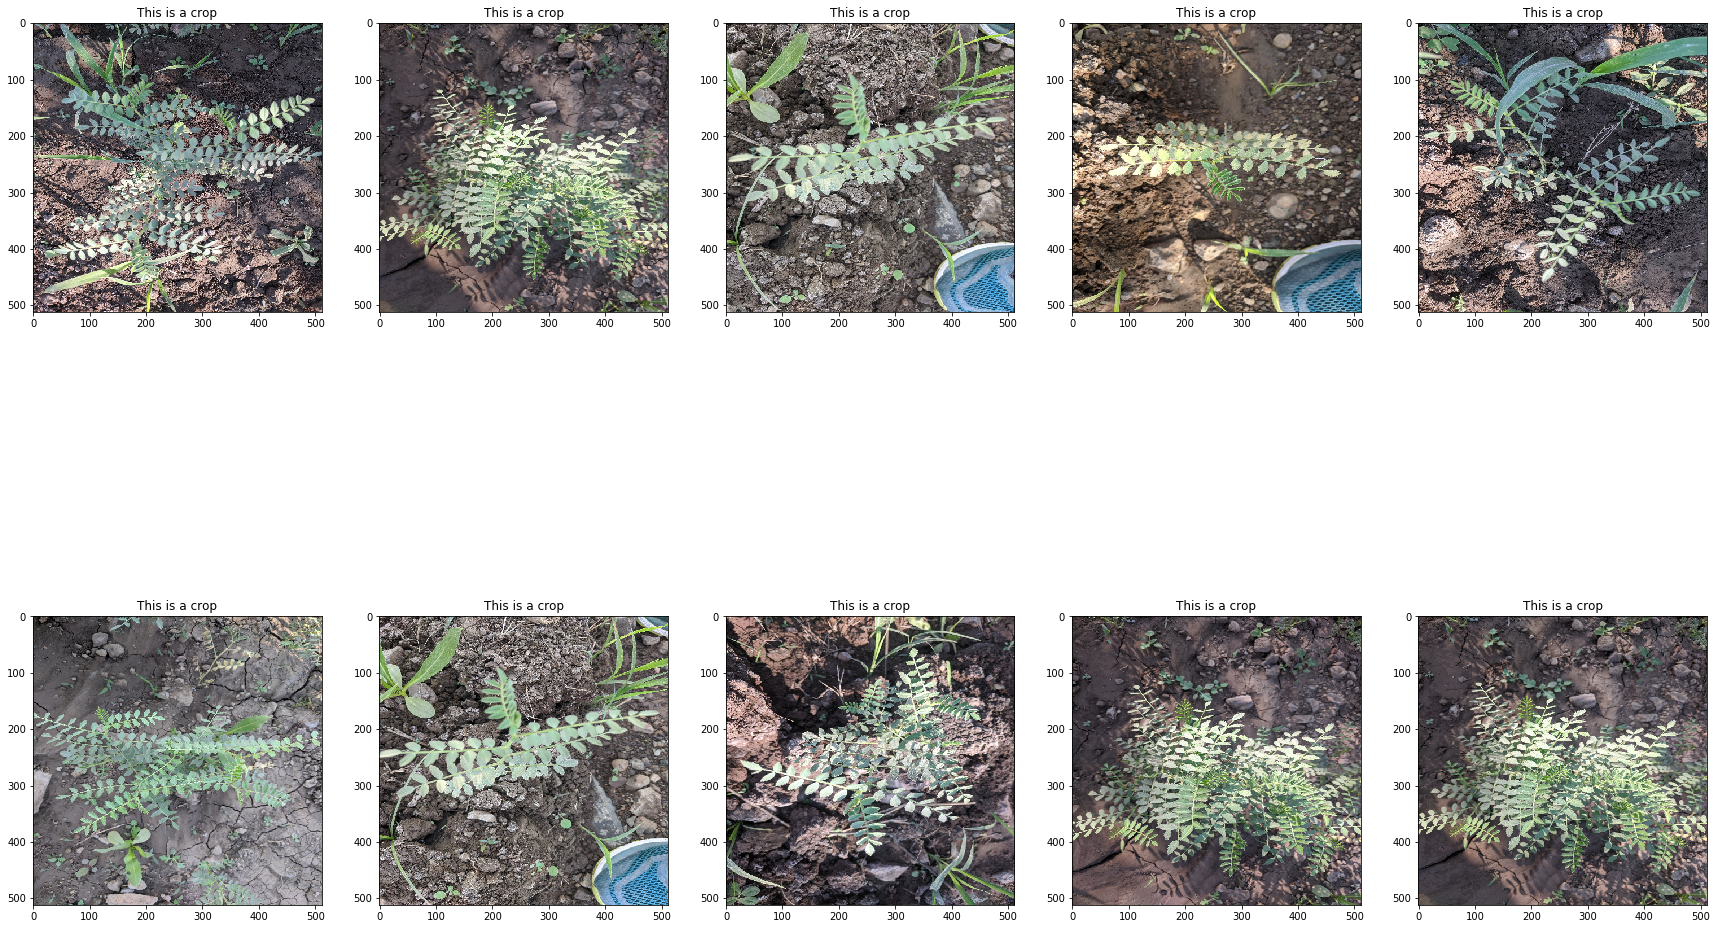

In [48]:
i = 0
columns = 5
text_labels = []
plt.figure(figsize=(30,20))
for batch in test_datagen.flow(x, batch_size=1):
    pred = model.predict(batch)
    if pred > 0.5:
        text_labels.append('crop')
    else:
        text_labels.append('weed')
    plt.subplot(5 / columns + 1, columns, i + 1)
    plt.title('This is a ' + text_labels[i])
    imgplot = plt.imshow(batch[0])
    i += 1
    if i % 10 == 0:
        break
plt.show()